#Итоговый проект: Real Estate Price Prediction

## Data Fields
**Id** - идентификационный номер квартиры

**DistrictId** - идентификационный номер района

**Rooms** - количество комнат

**Square** - площадь

**LifeSquare** - жилая площадь

**KitchenSquare** - площадь кухни

**Floor** - этаж

**HouseFloor** - количество этажей в доме

**HouseYear** - год постройки дома

**Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности

**Social_1, Social_2, Social_3** - социальные показатели местности

**Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья

**Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров

**Price** - цена квартиры

##Подключение библиотек и скриптов

In [1929]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import seaborn as sns
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype
 
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
 
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
 
    return df

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##Пути к директориям и файлам

In [1930]:
DATASET_TRAIN_PATH = './Final Project/train.csv'
DATASET_TEST_PATH = './Final Project/test.csv'
train_data = pd.read_csv(DATASET_TRAIN_PATH)
test_data = pd.read_csv(DATASET_TEST_PATH)

##Ознакомление с датасетом и переменными

In [1931]:
train_data = reduce_mem_usage(train_data) ##уменьшение размерности датасета

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.35 MB
Decreased by 76.8%


In [1932]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float16 
 3   Square         10000 non-null  float16 
 4   LifeSquare     7887 non-null   float16 
 5   KitchenSquare  10000 non-null  float16 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float16 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float16 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float16 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

In [1933]:
train_data

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.000000,NaN,10.0,4,10.0,2014,0.075439,B,B,11,3097,0,NaN,0,0,B,305018.875000
1,3013,22,1.0,39.843750,23.171875,8.0,7,8.0,1966,0.118530,B,B,30,6207,1,1183.0,1,0,B,177734.546875
2,8215,1,3.0,78.312500,47.687500,10.0,2,17.0,1988,0.025604,B,B,33,5261,0,240.0,3,1,B,282078.718750
3,2352,1,1.0,40.406250,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.000000
4,13866,94,2.0,64.312500,38.562500,9.0,16,16.0,1972,0.282715,B,B,33,8667,2,NaN,0,6,B,343995.093750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.093750,33.281250,6.0,3,12.0,1981,0.300293,B,B,52,10311,6,NaN,1,9,B,119367.453125
9996,16265,27,2.0,64.312500,37.031250,9.0,13,0.0,1977,0.072144,B,B,2,629,1,NaN,0,0,A,199715.156250
9997,2795,178,1.0,29.640625,16.562500,5.0,3,5.0,1958,0.460449,B,B,20,4386,14,NaN,1,5,B,165953.906250
9998,14561,21,1.0,32.343750,22.328125,5.0,3,9.0,1969,0.194458,B,B,47,8004,3,125.0,3,5,B,171842.406250


In [1934]:
train_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,1.000000e+04,7887.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.0,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.891602,inf,inf,6.273438e+00,8.526700,inf,3.990166e+03,0.118896,24.687000,5352.157400,8.039200,inf,1.319500,4.231300,214138.937500
std,4859.01902,43.587592,0.839844,inf,inf,inf,5.241148,6.777344e+00,2.005003e+05,0.119019,17.532614,4006.799803,23.831875,inf,1.493601,4.806341,92872.273438
min,0.00000,0.000000,0.000000,1.136719e+00,0.370605,0.000000e+00,1.000000,0.000000e+00,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.0,0.000000,0.000000,59174.777344
25%,4169.50000,20.000000,1.000000,4.178125e+01,22.765625,1.000000e+00,4.000000,9.000000e+00,1.974000e+03,0.017654,6.000000,1564.000000,0.000000,350.0,0.000000,1.000000,153872.628906
50%,8394.50000,36.000000,2.000000,5.250000e+01,32.781250,6.000000e+00,7.000000,1.300000e+01,1.977000e+03,0.075439,25.000000,5285.000000,2.000000,900.0,1.000000,3.000000,192269.648438
75%,12592.50000,75.000000,2.000000,6.587500e+01,45.125000,9.000000e+00,12.000000,1.700000e+01,2.001000e+03,0.195801,36.000000,7227.000000,5.000000,1548.0,2.000000,6.000000,249135.460938
max,16798.00000,209.000000,19.000000,6.410000e+02,7480.000000,2.014000e+03,42.000000,1.170000e+02,2.005201e+07,0.521973,74.000000,19083.000000,141.000000,4848.0,6.000000,23.000000,633233.437500


## Работа с признаками/переменными

### Id и DistrictId

In [1935]:
train_data['DistrictId'].dtype

dtype('int16')

In [1936]:
train_data['Id'].dtype

dtype('int16')

In [1937]:
train_data['DistrictId'].head(5)

0    27
1    22
2     1
3     1
4    94
Name: DistrictId, dtype: int16

In [1938]:
train_data['Id'].head(5)

0    11809
1     3013
2     8215
3     2352
4    13866
Name: Id, dtype: int16

*** Id - идентификационный номер квартиры
    DistrictId - идентификационный номер района
Индексs не представляют интереса, как признак, способный повлиять на цену жилья, поэтому можно его удалить ***

In [1939]:
train_data.drop(['Id', 'DistrictId'], axis=1,inplace=True)

In [1940]:
train_data.columns

Index(['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1',
       'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1',
       'Shops_2', 'Price'],
      dtype='object')

In [1941]:
test_data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2'],
      dtype='object')

### Rooms

In [1942]:
train_data['Rooms'].dtype

dtype('float16')

In [1943]:
train_data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

<AxesSubplot:title={'center':'Distribution of amount of rooms in apartment'}, xlabel='Rooms', ylabel='Number of apartments'>

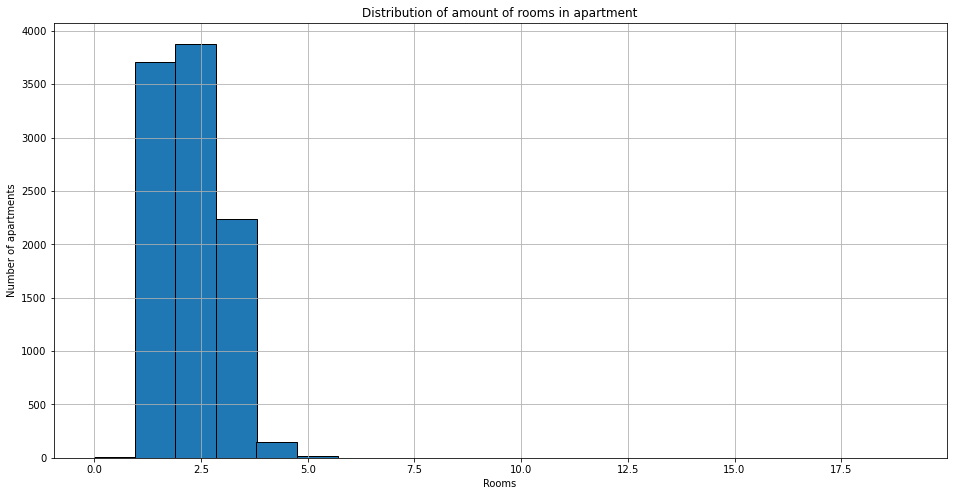

In [1944]:
plt.figure(figsize=(16,8))
plt.ylabel('Number of apartments')
plt.xlabel('Rooms')
plt.title('Distribution of amount of rooms in apartment')
train_data['Rooms'].hist(bins=20,edgecolor='black')

***Основной массив квартир приходится на количество комнат от 1 до 4. Количество комнат, равное нулю, является явной ошибкой, их,а также комнаты с 6 и более квартирами имеет смысл обработать, как выбросы, заменив на моду.***

In [1945]:
Rooms_mode = train_data['Rooms'].mode()[0]
train_data.loc[(train_data['Rooms'] < 1)|(train_data['Rooms']>5),'Rooms'] = Rooms_mode
train_data['Rooms'].value_counts()

2.0    3892
1.0    3705
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

In [1946]:
train_data.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,1.000000e+04,7887.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.0,10000.000000,10000.000000,10000.000000
mean,1.887695,inf,inf,6.273438e+00,8.526700,inf,3.990166e+03,0.118896,24.687000,5352.157400,8.039200,inf,1.319500,4.231300,214138.937500
std,0.811035,inf,inf,inf,5.241148,6.777344e+00,2.005003e+05,0.119019,17.532614,4006.799803,23.831875,inf,1.493601,4.806341,92872.273438
min,1.000000,1.136719e+00,0.370605,0.000000e+00,1.000000,0.000000e+00,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.0,0.000000,0.000000,59174.777344
25%,1.000000,4.178125e+01,22.765625,1.000000e+00,4.000000,9.000000e+00,1.974000e+03,0.017654,6.000000,1564.000000,0.000000,350.0,0.000000,1.000000,153872.628906
50%,2.000000,5.250000e+01,32.781250,6.000000e+00,7.000000,1.300000e+01,1.977000e+03,0.075439,25.000000,5285.000000,2.000000,900.0,1.000000,3.000000,192269.648438
75%,2.000000,6.587500e+01,45.125000,9.000000e+00,12.000000,1.700000e+01,2.001000e+03,0.195801,36.000000,7227.000000,5.000000,1548.0,2.000000,6.000000,249135.460938
max,5.000000,6.410000e+02,7480.000000,2.014000e+03,42.000000,1.170000e+02,2.005201e+07,0.521973,74.000000,19083.000000,141.000000,4848.0,6.000000,23.000000,633233.437500


### Square	LifeSquare	KitchenSquare

<AxesSubplot:title={'center':'Distribution of KitchenSquare in apartment'}, xlabel='KitchenSquare'>

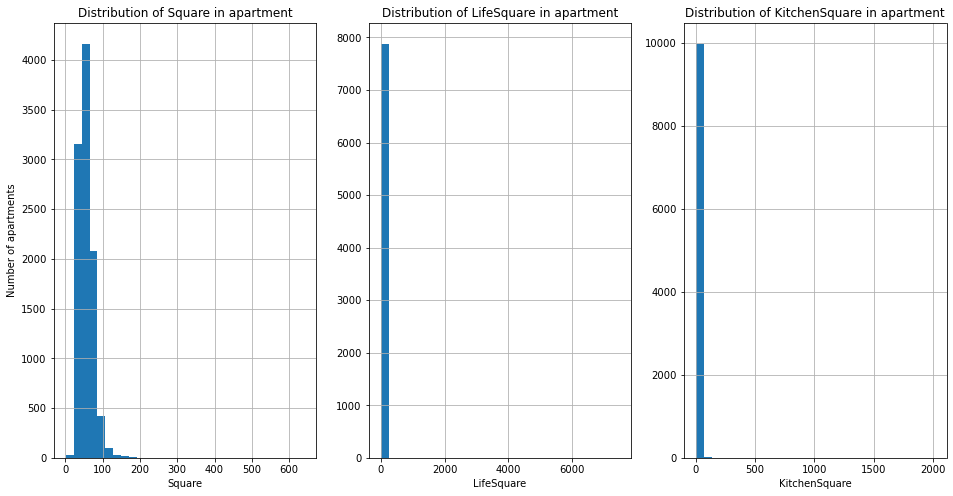

In [1947]:
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.ylabel('Number of apartments')
plt.xlabel('Square')
plt.title('Distribution of Square in apartment')
train_data['Square'].hist(bins=30)

plt.subplot(132)
plt.xlabel('LifeSquare')
plt.title('Distribution of LifeSquare in apartment')
train_data['LifeSquare'].hist(bins=30)

plt.subplot(133)
plt.xlabel('KitchenSquare')
plt.title('Distribution of KitchenSquare in apartment')
train_data['KitchenSquare'].hist(bins=30)


***Наблюдается неадекватное распределение всех трех площадей (особенно LifeSquare и KitchenSquare, что вероятно связано с большим количеством пропусков/выбросов. Также наблюдается неадекватное соотношение данных величин, при которых LifeSquare и KitchenSquare оказываются больше общей площади Square***

In [1948]:
train_data.loc[(train_data['Square']>200),'Square'] ### Наблюдаем лишь пять значений общей площади, превышающих значение 200 кв.м.

726     604.500
1776    200.375
1906    275.750
7010    409.500
7644    212.875
9229    641.000
Name: Square, dtype: float16

In [1949]:
train_data.loc[(train_data['LifeSquare']>200),'LifeSquare'] 

357      263.500
1776     201.625
1906     234.000
5183     461.500
7010     410.750
7644     211.250
8000    7480.000
9229     638.000
Name: LifeSquare, dtype: float16

***Наблюдаем восемь значений, среди которых явно ошибочное значение 7480 кв.м., также видим случаи, где жилая площадь практически равна общей площади или даже превышают ее, что также не может быть правдой***

In [1950]:
train_data.loc[(train_data['LifeSquare']==7480),'Square'] 

8000    81.6875
Name: Square, dtype: float16

***Для данного значения под индексом 8000 имеем значение общей площади, равное 81 кв.м. ==> данное значение является ошибкой, возникшей в ходе сбора/обработки данных***

In [1951]:
train_data.loc[(train_data['KitchenSquare']>200),'KitchenSquare']

6505    1970.0
9520    2014.0
Name: KitchenSquare, dtype: float16

In [1952]:
train_data.loc[(train_data['KitchenSquare']>200),'Square']

6505    32.28125
9520    47.09375
Name: Square, dtype: float16

***С показателем KitchenSquare аналогичная ситуация - явная ошибка при обработке данных***

In [1953]:
train_data.loc[(train_data['LifeSquare']>train_data['Square']),'LifeSquare'] # 479 значений, где жилая площадь больше общей

33      74.12500
64      87.75000
77      39.62500
100     82.93750
111     32.50000
          ...   
9960    98.12500
9962    44.68750
9979    41.96875
9987    64.62500
9993    88.93750
Name: LifeSquare, Length: 479, dtype: float16

In [1954]:
train_data.loc[(train_data['KitchenSquare']>train_data['Square']),'KitchenSquare'] # 4 значения, где кухня больше общей площади

2785      84.0
5273      73.0
6505    1970.0
9520    2014.0
Name: KitchenSquare, dtype: float16

In [1955]:
kitchen_to_square = train_data['KitchenSquare'].median() / train_data['Square'].median()
kitchen_to_square # среднее отношение площади кухни к площади квартиры

0.11426

In [1956]:
life_to_square = train_data['LifeSquare'].median() / train_data['Square'].median()
life_to_square # среднее отношение жилой площади к общей площади квартиры

0.6245

In [1957]:
train_data.loc[(train_data['KitchenSquare']>train_data['Square']),'KitchenSquare'] = train_data.loc[(train_data['KitchenSquare']>train_data['Square']),'Square'] * kitchen_to_square
# Заполнить неадекватные значения в KitchenSquare можно отношением, полученным от умножения Square на среднее отношение kitchen_to_square
train_data.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,1.000000e+04,7887.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.0,10000.000000,10000.000000,10000.000000
mean,1.887695,inf,inf,5.859375,8.526700,inf,3.990166e+03,0.118896,24.687000,5352.157400,8.039200,inf,1.319500,4.231300,214138.937500
std,0.811035,inf,inf,5.070312,5.241148,6.777344e+00,2.005003e+05,0.119019,17.532614,4006.799803,23.831875,inf,1.493601,4.806341,92872.273438
min,1.000000,1.136719e+00,0.370605,0.000000,1.000000,0.000000e+00,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.0,0.000000,0.000000,59174.777344
25%,1.000000,4.178125e+01,22.765625,1.000000,4.000000,9.000000e+00,1.974000e+03,0.017654,6.000000,1564.000000,0.000000,350.0,0.000000,1.000000,153872.628906
50%,2.000000,5.250000e+01,32.781250,6.000000,7.000000,1.300000e+01,1.977000e+03,0.075439,25.000000,5285.000000,2.000000,900.0,1.000000,3.000000,192269.648438
75%,2.000000,6.587500e+01,45.125000,9.000000,12.000000,1.700000e+01,2.001000e+03,0.195801,36.000000,7227.000000,5.000000,1548.0,2.000000,6.000000,249135.460938
max,5.000000,6.410000e+02,7480.000000,123.000000,42.000000,1.170000e+02,2.005201e+07,0.521973,74.000000,19083.000000,141.000000,4848.0,6.000000,23.000000,633233.437500


In [1958]:
train_data.loc[(train_data['LifeSquare']>train_data['Square']),'LifeSquare'] = train_data.loc[(train_data['LifeSquare']>train_data['Square']),'Square'] * life_to_square
# Аналогично с неадекватными значениями life_square
train_data.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,1.000000e+04,7887.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.0,10000.000000,10000.000000,10000.000000
mean,1.887695,inf,inf,5.859375,8.526700,inf,3.990166e+03,0.118896,24.687000,5352.157400,8.039200,inf,1.319500,4.231300,214138.937500
std,0.811035,inf,inf,5.070312,5.241148,6.777344e+00,2.005003e+05,0.119019,17.532614,4006.799803,23.831875,inf,1.493601,4.806341,92872.273438
min,1.000000,1.136719e+00,0.370605,0.000000,1.000000,0.000000e+00,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.0,0.000000,0.000000,59174.777344
25%,1.000000,4.178125e+01,22.687500,1.000000,4.000000,9.000000e+00,1.974000e+03,0.017654,6.000000,1564.000000,0.000000,350.0,0.000000,1.000000,153872.628906
50%,2.000000,5.250000e+01,32.093750,6.000000,7.000000,1.300000e+01,1.977000e+03,0.075439,25.000000,5285.000000,2.000000,900.0,1.000000,3.000000,192269.648438
75%,2.000000,6.587500e+01,43.812500,9.000000,12.000000,1.700000e+01,2.001000e+03,0.195801,36.000000,7227.000000,5.000000,1548.0,2.000000,6.000000,249135.460938
max,5.000000,6.410000e+02,638.000000,123.000000,42.000000,1.170000e+02,2.005201e+07,0.521973,74.000000,19083.000000,141.000000,4848.0,6.000000,23.000000,633233.437500


<AxesSubplot:title={'center':'Distribution of KitchenSquare in apartment'}, xlabel='KitchenSquare'>

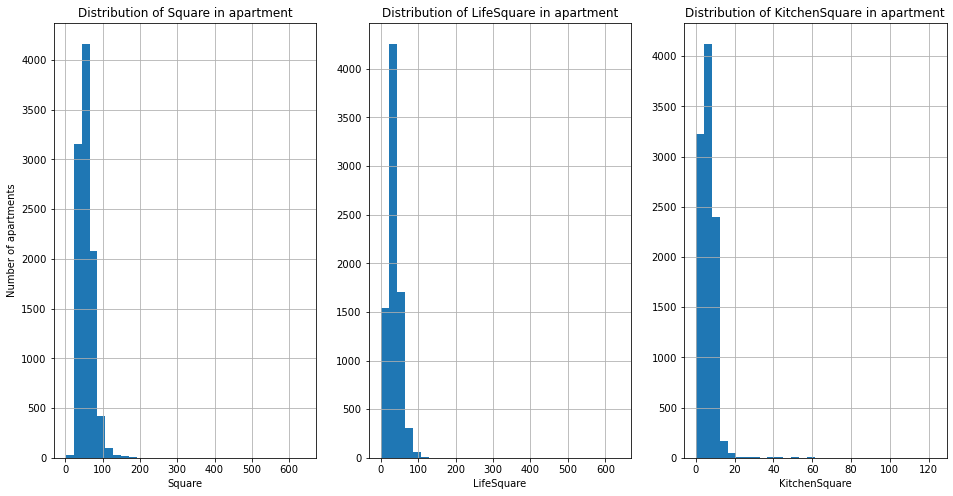

In [1959]:
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.ylabel('Number of apartments')
plt.xlabel('Square')
plt.title('Distribution of Square in apartment')
train_data['Square'].hist(bins=30)

plt.subplot(132)
plt.xlabel('LifeSquare')
plt.title('Distribution of LifeSquare in apartment')
train_data['LifeSquare'].hist(bins=30)

plt.subplot(133)
plt.xlabel('KitchenSquare')
plt.title('Distribution of KitchenSquare in apartment')
train_data['KitchenSquare'].hist(bins=30)


***Наблюдается улучшение распределения, однако все еще требуется обработка выбросов и пропусков***

<AxesSubplot:xlabel='KitchenSquare'>

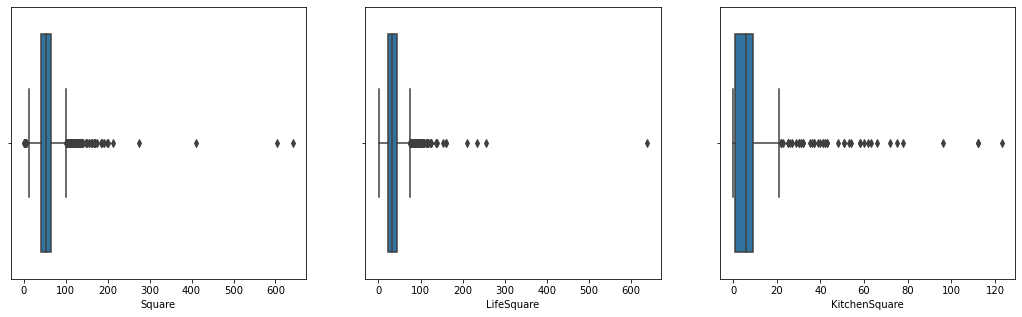

In [1960]:
plt.figure(figsize=(18,5))
plt.subplot(131)
plt.xlabel('Square')
sns.boxplot(train_data['Square'], whis=1.5)

plt.subplot(132)
plt.xlabel('LifeSquare')
sns.boxplot(train_data['LifeSquare'], whis=1.5)

plt.subplot(133)
plt.xlabel('KitchenSquare')
sns.boxplot(train_data['KitchenSquare'], whis=1.5)

***Судя по боксплотам при обработке выбросов в данных показателях имеет смысл воспользоваться межквартильным размахом и заменой на медиану***

In [1961]:
train_data.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,1.000000e+04,7887.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.0,10000.000000,10000.000000,10000.000000
mean,1.887695,inf,inf,5.859375,8.526700,inf,3.990166e+03,0.118896,24.687000,5352.157400,8.039200,inf,1.319500,4.231300,214138.937500
std,0.811035,inf,inf,5.070312,5.241148,6.777344e+00,2.005003e+05,0.119019,17.532614,4006.799803,23.831875,inf,1.493601,4.806341,92872.273438
min,1.000000,1.136719e+00,0.370605,0.000000,1.000000,0.000000e+00,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.0,0.000000,0.000000,59174.777344
25%,1.000000,4.178125e+01,22.687500,1.000000,4.000000,9.000000e+00,1.974000e+03,0.017654,6.000000,1564.000000,0.000000,350.0,0.000000,1.000000,153872.628906
50%,2.000000,5.250000e+01,32.093750,6.000000,7.000000,1.300000e+01,1.977000e+03,0.075439,25.000000,5285.000000,2.000000,900.0,1.000000,3.000000,192269.648438
75%,2.000000,6.587500e+01,43.812500,9.000000,12.000000,1.700000e+01,2.001000e+03,0.195801,36.000000,7227.000000,5.000000,1548.0,2.000000,6.000000,249135.460938
max,5.000000,6.410000e+02,638.000000,123.000000,42.000000,1.170000e+02,2.005201e+07,0.521973,74.000000,19083.000000,141.000000,4848.0,6.000000,23.000000,633233.437500


In [1962]:
square_q_950 = np.quantile(train_data['Square'], q=0.95)
square_q_025 = np.quantile(train_data['Square'], q=0.025)
square_median = train_data['Square'].median()
train_data.loc[(train_data['Square']>square_q_950)|(train_data['Square']<square_q_025),'Square'] = square_median

In [1963]:
train_data['LifeSquare'].isna().sum()

2113

***В столбце LifeSquare 2113 пропусков, которые необходимо заполнить***

In [1964]:
train_data.loc[train_data['LifeSquare'].isnull()==True,'LifeSquare'] = train_data.loc[train_data['LifeSquare'].isnull()==True,'Square'] * life_to_square
# Логичнее заполнить их, исходя из усредненного отношения жилой площади к общей

In [1965]:
life_square_q_950 = np.quantile(train_data['LifeSquare'], q=0.95)
life_square_q_025 = np.quantile(train_data['LifeSquare'], q=0.025)
life_square_median = train_data['LifeSquare'].median()
train_data.loc[(train_data['LifeSquare']>life_square_q_950)|(train_data['LifeSquare']<life_square_q_025),'LifeSquare'] = life_square_median

In [1966]:
kitchen_square_q_950 = np.quantile(train_data['KitchenSquare'], q=0.95)
kitchen_square_median = train_data['KitchenSquare'].median()
train_data.loc[(train_data['KitchenSquare']>kitchen_square_q_950)|(train_data['KitchenSquare']<1),'KitchenSquare'] = kitchen_square_median

In [1967]:
train_data.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.0,10000.000000,10000.000000,10000.000000
mean,1.887695,inf,inf,5.906250,8.526700,inf,3.990166e+03,0.118896,24.687000,5352.157400,8.039200,inf,1.319500,4.231300,214138.937500
std,0.811035,1.392969e+01,9.976562e+00,3.292969,5.241148,6.777344e+00,2.005003e+05,0.119019,17.532614,4006.799803,23.831875,inf,1.493601,4.806341,92872.273438
min,1.000000,3.209375e+01,1.482812e+01,1.000000,1.000000,0.000000e+00,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.0,0.000000,0.000000,59174.777344
25%,1.000000,4.240625e+01,2.508984e+01,4.000000,4.000000,9.000000e+00,1.974000e+03,0.017654,6.000000,1564.000000,0.000000,350.0,0.000000,1.000000,153872.628906
50%,2.000000,5.250000e+01,3.278125e+01,6.000000,7.000000,1.300000e+01,1.977000e+03,0.075439,25.000000,5285.000000,2.000000,900.0,1.000000,3.000000,192269.648438
75%,2.000000,6.340625e+01,4.046875e+01,8.000000,12.000000,1.700000e+01,2.001000e+03,0.195801,36.000000,7227.000000,5.000000,1548.0,2.000000,6.000000,249135.460938
max,5.000000,8.787500e+01,6.006250e+01,12.000000,42.000000,1.170000e+02,2.005201e+07,0.521973,74.000000,19083.000000,141.000000,4848.0,6.000000,23.000000,633233.437500


<AxesSubplot:xlabel='KitchenSquare'>

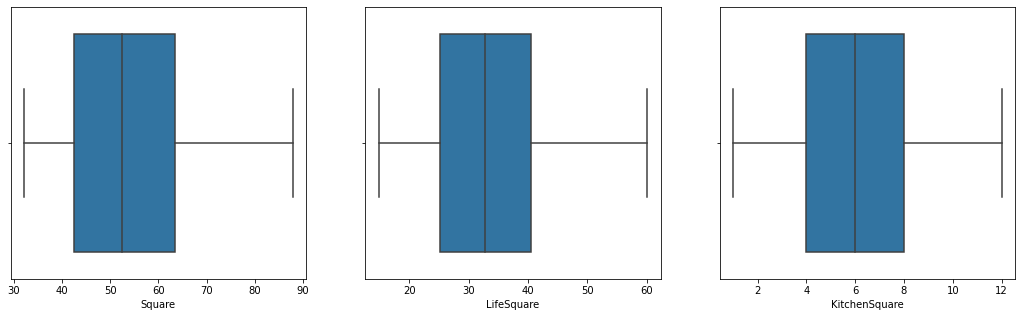

In [1968]:
plt.figure(figsize=(18,5))
plt.subplot(131)
plt.xlabel('Square')
sns.boxplot(train_data['Square'], whis=1.5)

plt.subplot(132)
plt.xlabel('LifeSquare')
sns.boxplot(train_data['LifeSquare'], whis=1.5)

plt.subplot(133)
plt.xlabel('KitchenSquare')
sns.boxplot(train_data['KitchenSquare'], whis=1.5)

<AxesSubplot:title={'center':'Distribution of KitchenSquare in apartment'}, xlabel='KitchenSquare'>

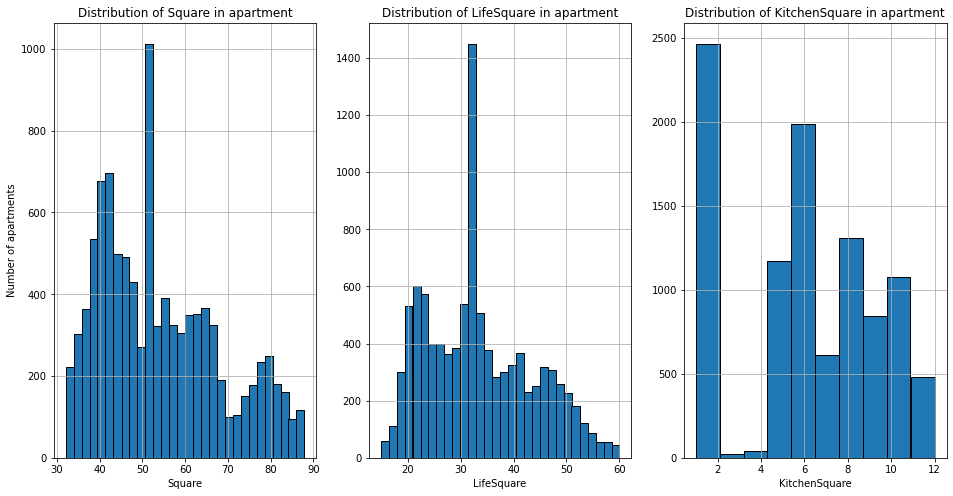

In [1969]:
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.ylabel('Number of apartments')
plt.xlabel('Square')
plt.title('Distribution of Square in apartment')
train_data['Square'].hist(bins=30,edgecolor='black')

plt.subplot(132)
plt.xlabel('LifeSquare')
plt.title('Distribution of LifeSquare in apartment')
train_data['LifeSquare'].hist(bins=30, edgecolor='black')

plt.subplot(133)
plt.xlabel('KitchenSquare')
plt.title('Distribution of KitchenSquare in apartment')
train_data['KitchenSquare'].hist(bins=10, edgecolor='black')

### Floor, HouseFloor

In [1970]:
train_data['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int8)

In [1971]:
train_data['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.],
      dtype=float16)

***Ненормальна ситуация, в которой в доме 0 этажей - это явная ошибка***

In [1972]:
train_data.loc[train_data['HouseFloor']==0,'HouseFloor'] # Таких значений 269

24      0.0
152     0.0
159     0.0
186     0.0
229     0.0
       ... 
9889    0.0
9931    0.0
9940    0.0
9950    0.0
9996    0.0
Name: HouseFloor, Length: 269, dtype: float16

In [1973]:
train_data.loc[train_data['Floor']>train_data['HouseFloor'],'Floor']

17       6
19      16
21      11
24       2
25      18
        ..
9960    15
9968    18
9970    18
9975    18
9996    13
Name: Floor, Length: 1825, dtype: int8

In [1974]:
train_data.loc[train_data['HouseFloor']==0,'Floor'] # Причем у квартир в данных строках этажи указаны корректно (нет ни одного нулевого значения)

24       2
152     14
159      6
186      8
229     15
        ..
9889     2
9931    14
9940     8
9950     3
9996    13
Name: Floor, Length: 269, dtype: int8

***К сожалению, мы не имеем возможности узнать по каким-либо косвенным признакам количество этажей в домах, где некорректно указано количество этажей, равное 0 --> можно приравнять количество этажей к этажу квартиры, указанной в Floor.***

In [1975]:
train_data.loc[train_data['HouseFloor']==0,'HouseFloor'] = train_data.loc[train_data['HouseFloor']==0,'Floor']
train_data.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.0,10000.000000,10000.000000,10000.000000
mean,1.887695,inf,inf,5.906250,8.526700,inf,3.990166e+03,0.118896,24.687000,5352.157400,8.039200,inf,1.319500,4.231300,214138.937500
std,0.811035,1.392969e+01,9.976562e+00,3.292969,5.241148,6.535156e+00,2.005003e+05,0.119019,17.532614,4006.799803,23.831875,inf,1.493601,4.806341,92872.273438
min,1.000000,3.209375e+01,1.482812e+01,1.000000,1.000000,1.000000e+00,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.0,0.000000,0.000000,59174.777344
25%,1.000000,4.240625e+01,2.508984e+01,4.000000,4.000000,9.000000e+00,1.974000e+03,0.017654,6.000000,1564.000000,0.000000,350.0,0.000000,1.000000,153872.628906
50%,2.000000,5.250000e+01,3.278125e+01,6.000000,7.000000,1.400000e+01,1.977000e+03,0.075439,25.000000,5285.000000,2.000000,900.0,1.000000,3.000000,192269.648438
75%,2.000000,6.340625e+01,4.046875e+01,8.000000,12.000000,1.700000e+01,2.001000e+03,0.195801,36.000000,7227.000000,5.000000,1548.0,2.000000,6.000000,249135.460938
max,5.000000,8.787500e+01,6.006250e+01,12.000000,42.000000,1.170000e+02,2.005201e+07,0.521973,74.000000,19083.000000,141.000000,4848.0,6.000000,23.000000,633233.437500


***Для всех объектов значение поля Floor не может быть больше значения HouseFloor***

In [1976]:
train_data.loc[train_data['Floor']>train_data['HouseFloor'],'Floor'] # таких значений целых 1556

17       6
19      16
21      11
25      18
26      13
        ..
9953    19
9960    15
9968    18
9970    18
9975    18
Name: Floor, Length: 1556, dtype: int8

In [1977]:
train_data.loc[train_data['Floor']>train_data['HouseFloor'],'HouseFloor'] = train_data.loc[train_data['Floor']>train_data['HouseFloor'],'Floor']

***Такие значения также можно заменить на фактический этаж квартиры***

<AxesSubplot:title={'center':'Distribution of Floor amount in House'}, xlabel='HouseFloor'>

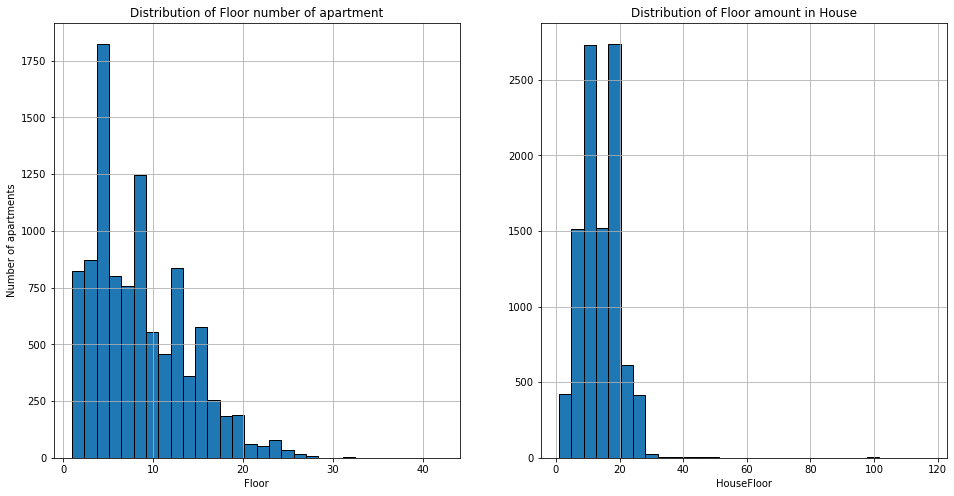

In [1978]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.ylabel('Number of apartments')
plt.xlabel('Floor')
plt.title('Distribution of Floor number of apartment')
train_data['Floor'].hist(bins=30,edgecolor='black')

plt.subplot(122)
plt.xlabel('HouseFloor')
plt.title('Distribution of Floor amount in House')
train_data['HouseFloor'].hist(bins=30, edgecolor='black')

In [1979]:
floor_q_975 = np.quantile(train_data['Floor'], q=0.975)
floor_q_025 = np.quantile(train_data['Floor'], q=0.025)
floor_mode = train_data['Floor'].mode()[0]
train_data.loc[(train_data['Floor']>floor_q_975)|(train_data['Floor']<floor_q_025),'Floor'] = floor_mode

In [1980]:
house_floor_q_975 = np.quantile(train_data['HouseFloor'], q=0.975)
house_floor_q_025 = np.quantile(train_data['HouseFloor'], q=0.025)
house_floor_mode = train_data['HouseFloor'].mode()[0]
train_data.loc[(train_data['HouseFloor']>house_floor_q_975)|(train_data['HouseFloor']<house_floor_q_025),'HouseFloor'] = house_floor_mode

In [1981]:
train_data.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.0000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.0,10000.000000,10000.000000,10000.000000
mean,1.887695,inf,inf,5.906250,8.198500,inf,3.990166e+03,0.118896,24.687000,5352.157400,8.039200,inf,1.319500,4.231300,214138.937500
std,0.811035,1.392969e+01,9.976562e+00,3.292969,4.687653,5.4375,2.005003e+05,0.119019,17.532614,4006.799803,23.831875,inf,1.493601,4.806341,92872.273438
min,1.000000,3.209375e+01,1.482812e+01,1.000000,2.000000,4.0000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.0,0.000000,0.000000,59174.777344
25%,1.000000,4.240625e+01,2.508984e+01,4.000000,4.000000,9.0000,1.974000e+03,0.017654,6.000000,1564.000000,0.000000,350.0,0.000000,1.000000,153872.628906
50%,2.000000,5.250000e+01,3.278125e+01,6.000000,7.000000,14.0000,1.977000e+03,0.075439,25.000000,5285.000000,2.000000,900.0,1.000000,3.000000,192269.648438
75%,2.000000,6.340625e+01,4.046875e+01,8.000000,11.000000,17.0000,2.001000e+03,0.195801,36.000000,7227.000000,5.000000,1548.0,2.000000,6.000000,249135.460938
max,5.000000,8.787500e+01,6.006250e+01,12.000000,21.000000,25.0000,2.005201e+07,0.521973,74.000000,19083.000000,141.000000,4848.0,6.000000,23.000000,633233.437500


<AxesSubplot:title={'center':"Distribution of Floor's amount in House"}, xlabel='HouseFloor'>

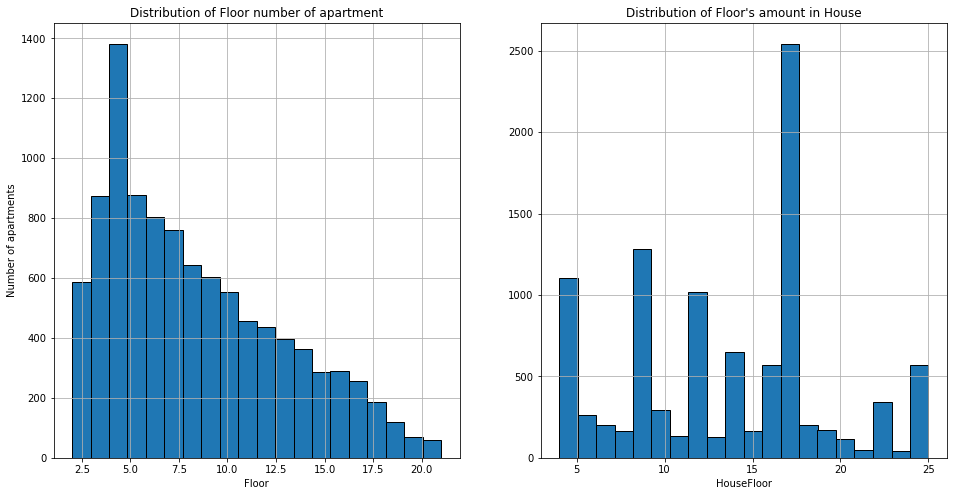

In [1982]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.ylabel('Number of apartments')
plt.xlabel('Floor')
plt.title('Distribution of Floor number of apartment')
train_data['Floor'].hist(bins=20,edgecolor='black')

plt.subplot(122)
plt.xlabel('HouseFloor')
plt.title("Distribution of Floor's amount in House")
train_data['HouseFloor'].hist(bins=20, edgecolor='black')

<AxesSubplot:xlabel='HouseFloor'>

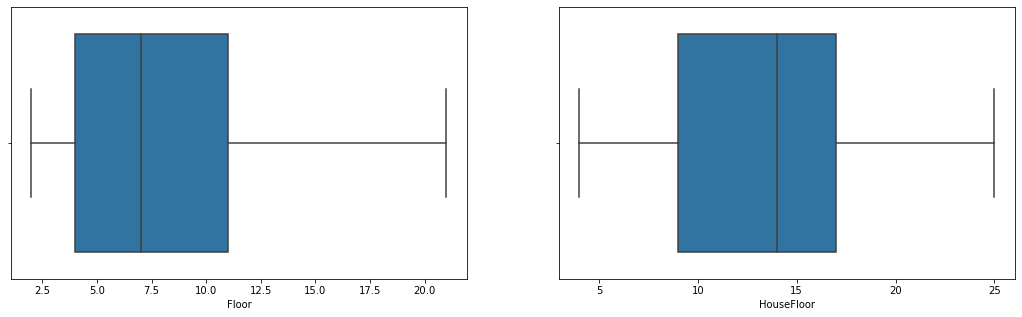

In [1983]:
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.xlabel('Floor')
sns.boxplot(train_data['Floor'], whis=1.5)

plt.subplot(122)
plt.xlabel('HouseFloor')
sns.boxplot(train_data['HouseFloor'], whis=1.5)


### HouseYear

In [1984]:
train_data['HouseYear'].sort_values().unique()

array([    1910,     1912,     1914,     1916,     1917,     1918,
           1919,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1947,     1948,
           1950,     1951,     1952,     1953,     1954,     1955,
           1956,     1957,     1958,     1959,     1960,     1961,
           1962,     1963,     1964,     1965,     1966,     1967,
           1968,     1969,     1970,     1971,     1972,     1973,
           1974,     1975,     1976,     1977,     1978,     1979,
           1980,     1981,     1982,     1983,     1984,     1985,
           1986,     1987,     1988,     1989,     1990,     1991,
           1992,     1993,     1994,     1995,     1996,     1997,
           1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2

***Наблюдается два странных значения - 4968 и 20052011***

In [1985]:
train_data.loc[(train_data['HouseYear']==4968)|(train_data['HouseYear']==20052011),'HouseYear']

8828        4968
9163    20052011
Name: HouseYear, dtype: int32

In [1986]:
house_year_mode = train_data['HouseYear'].mode()[0]
train_data.loc[(train_data['HouseYear']>2020),'HouseYear'] = house_year_mode # значение 4968 является явной ошибкой, поэтому его можно заменить на моду

***Значение 20052011 является либо временным промежутком, либо деформированной в результате некорректной обработки данных записью '2005/2011'. Так или иначе, также возможна замена моду***

<AxesSubplot:title={'center':"Distribution of apartment's House year"}, xlabel='HouseYear', ylabel='Number of apartments'>

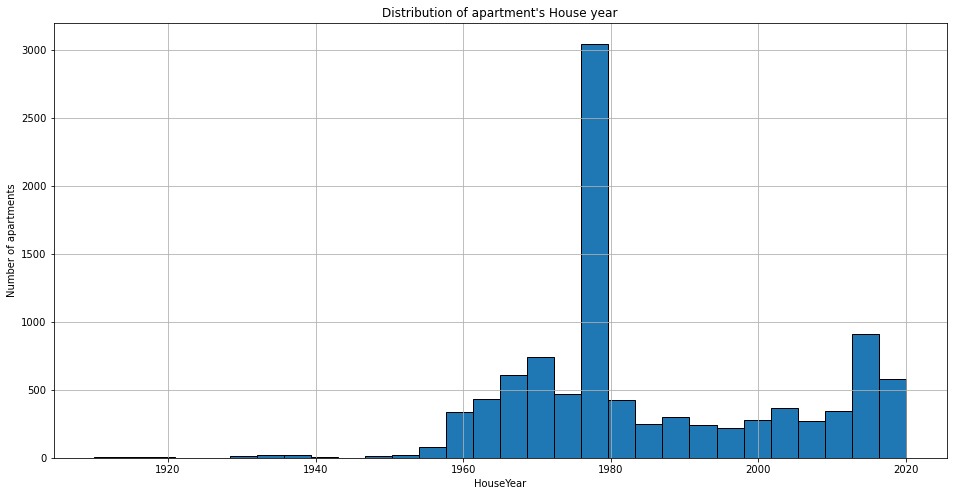

In [1987]:
plt.figure(figsize=(16,8))
plt.ylabel('Number of apartments')
plt.xlabel('HouseYear')
plt.title("Distribution of apartment's House year")
train_data['HouseYear'].hist(bins=30,edgecolor='black')

<AxesSubplot:xlabel='HouseYear'>

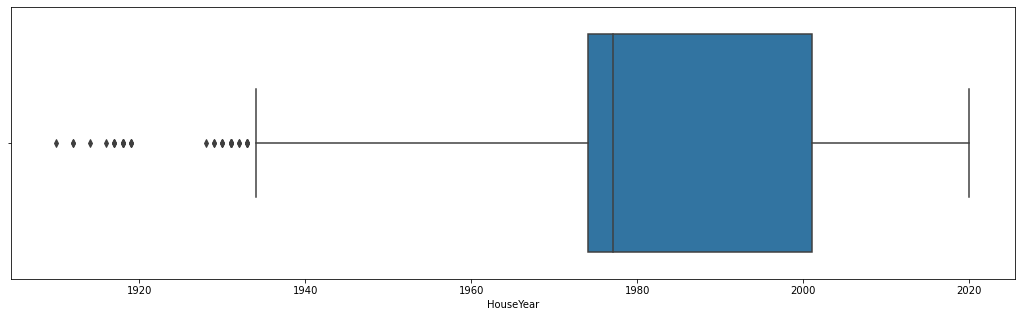

In [1988]:
plt.figure(figsize=(18,5))
plt.xlabel('HouseYear')
sns.boxplot(train_data['HouseYear'], whis=1.5)

***Выбросы наблюдаются слева --> домов старого фонда не так много, их можно заменить на моду***

In [1989]:
house_year_025 = np.quantile(train_data['HouseYear'],q=0.025)
train_data.loc[train_data['HouseYear']<house_year_025,'HouseYear'] = house_year_mode

<AxesSubplot:xlabel='HouseYear'>

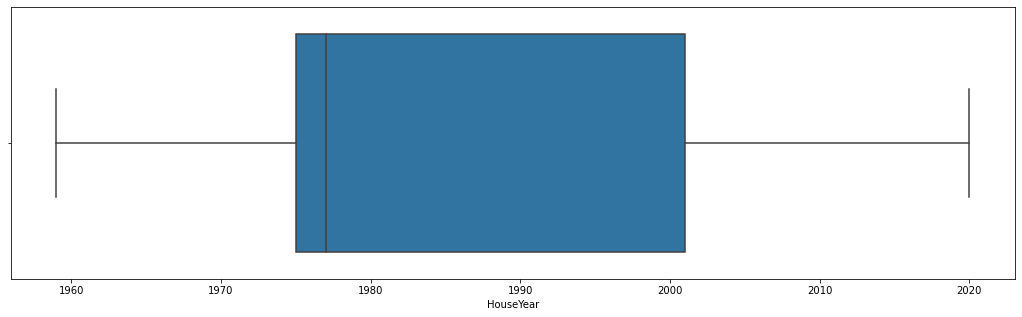

In [1990]:
plt.figure(figsize=(18,5))
plt.xlabel('HouseYear')
sns.boxplot(train_data['HouseYear'], whis=1.5)

### Ecology 1

In [1991]:
train_data['Ecology_1'].describe()

count    10000.000000
mean         0.118896
std          0.119019
min          0.000000
25%          0.017654
50%          0.075439
75%          0.195801
max          0.521973
Name: Ecology_1, dtype: float64

In [1992]:
train_data.loc[train_data['Ecology_1']==0,'Ecology_1']

22      0.0
51      0.0
98      0.0
105     0.0
121     0.0
       ... 
9892    0.0
9905    0.0
9961    0.0
9974    0.0
9986    0.0
Name: Ecology_1, Length: 547, dtype: float16

<AxesSubplot:title={'center':'Distribution of Ecological enviroment of apartment'}, xlabel='Ecology_1', ylabel='Number of apartments'>

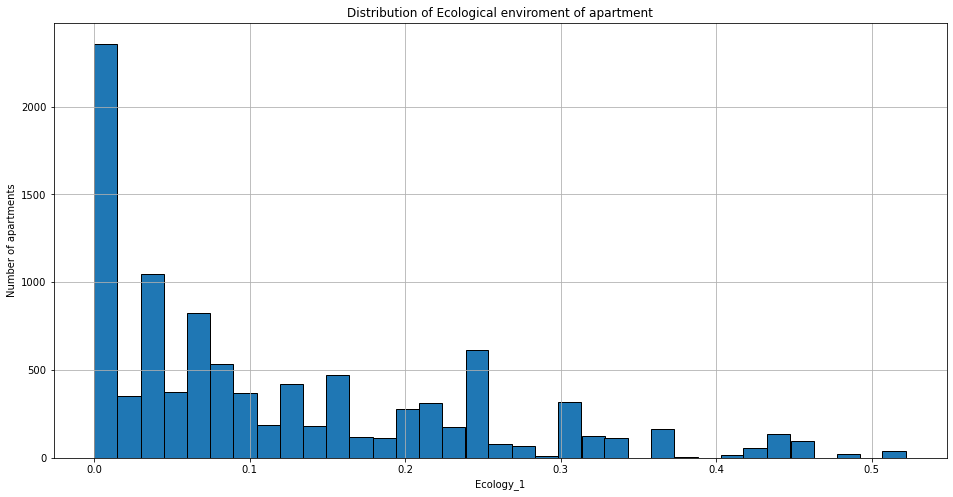

In [1993]:
plt.figure(figsize=(16,8))
plt.ylabel('Number of apartments')
plt.xlabel('Ecology_1')
plt.title('Distribution of Ecological enviroment of apartment')
train_data['Ecology_1'].hist(bins=35,edgecolor='black')

<AxesSubplot:xlabel='Ecology_1'>

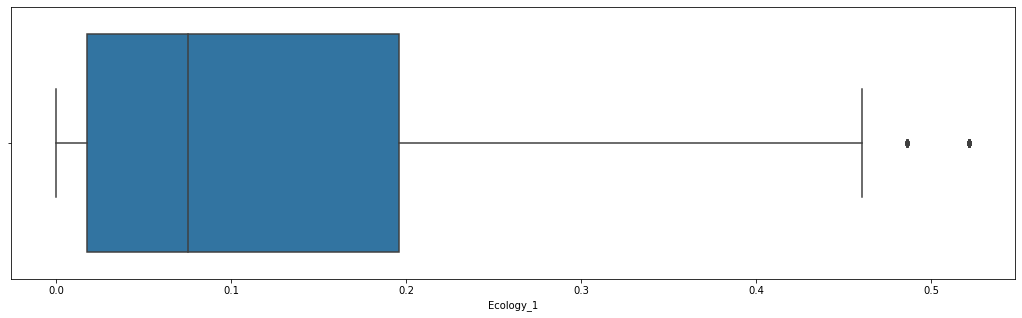

In [1994]:
plt.figure(figsize=(18,5))
plt.xlabel('Ecology_1')
sns.boxplot(train_data['Ecology_1'], whis=1.5)

***Распределение не нормальное --> меняем выбросы на медиану. В выборке 547 значений, равных нулю, также большая часть данных находится рядом с нулем, что скорее всего означает, что ноль не является выбросом для данного признака.***

In [1995]:
eco_1_median = train_data['Ecology_1'].median()
eco_1_q_975 = np.quantile(train_data['Ecology_1'], q=0.975)
eco_1_q_025 = np.quantile(train_data['Ecology_1'], q=0.025)
train_data.loc[(train_data['Ecology_1']>eco_1_q_975)|(train_data['Ecology_1']<eco_1_q_025),'Ecology_1'] = eco_1_median

<AxesSubplot:xlabel='Ecology_1'>

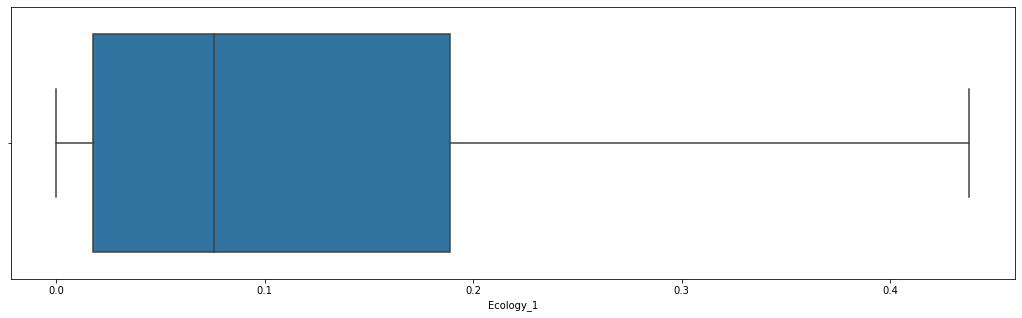

In [1996]:
plt.figure(figsize=(18,5))
plt.xlabel('Ecology_1')
sns.boxplot(train_data['Ecology_1'], whis=1.5)

### Ecology 2, Ecology 3

In [1997]:
train_data.Ecology_2.describe()

count     10000
unique        2
top           B
freq       9903
Name: Ecology_2, dtype: object

In [1998]:
train_data.Ecology_3.describe()

count     10000
unique        2
top           B
freq       9725
Name: Ecology_3, dtype: object

In [1999]:
train_data.Ecology_2.value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [2000]:
train_data.Ecology_3.value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

***В обоих категориальных признаках Ecology 2-3 наблюдается высокая монотонность: в обоих случаях практически вся выборка представлена объектом В. Поэтому данные 2 признака разумнее будет исключить***

In [2001]:
train_data.drop(['Ecology_2', 'Ecology_3'], axis=1,inplace=True)

In [2002]:
test_data

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B


### Social_1

In [2003]:
train_data.Social_1.dtype

dtype('int8')

In [2004]:
train_data.Social_1.sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 41, 42, 43, 46, 47, 49, 50, 52, 53, 66, 74],
      dtype=int8)

In [2005]:
train_data.Social_1.describe()

count    10000.000000
mean        24.687000
std         17.532614
min          0.000000
25%          6.000000
50%         25.000000
75%         36.000000
max         74.000000
Name: Social_1, dtype: float64

In [2006]:
train_data['Social_1'].value_counts()

2     688
1     654
25    557
5     528
30    465
23    434
6     377
22    367
53    355
34    311
33    252
46    245
31    243
43    238
9     213
36    209
21    207
37    205
24    205
52    201
0     201
35    200
47    177
74    176
39    159
27    151
28    144
4     141
11    138
42    129
26    127
16    123
19    118
66     99
17     96
49     95
18     92
32     87
41     83
50     79
29     70
38     64
8      62
15     51
20     50
14     46
10     24
13     22
12     18
7      15
3       9
Name: Social_1, dtype: int64

<AxesSubplot:title={'center':'Distribution of Social_1 of apartment'}, xlabel='Social_1', ylabel='Number of apartments'>

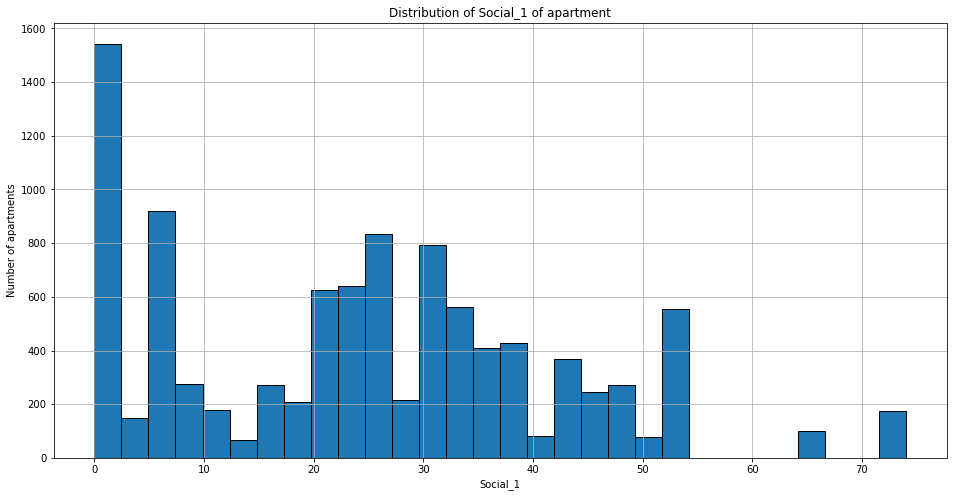

In [2007]:
plt.figure(figsize=(16,8))
plt.ylabel('Number of apartments')
plt.xlabel('Social_1')
plt.title('Distribution of Social_1 of apartment')
train_data.Social_1.hist(bins=30, edgecolor='black')

***Также, как и в случае с Ecology_1, Social_1 вероятно является неким индексом/шкалой, в которой присутствует значение 0, т.е. за выброс его считать скорее всего не следует***

<AxesSubplot:xlabel='Social_1'>

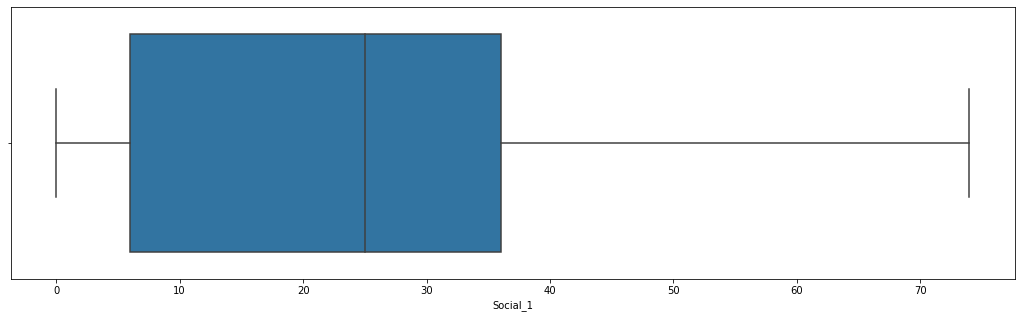

In [2008]:
plt.figure(figsize=(18,5))
plt.xlabel('Social_1')
sns.boxplot(train_data['Social_1'], whis=1.5)

***Cогласно графику боксплот, выбросов нет***

### Social_2

In [2009]:
train_data.Social_2.dtype

dtype('int16')

In [2010]:
train_data.Social_2.describe()

count    10000.000000
mean      5352.157400
std       4006.799803
min        168.000000
25%       1564.000000
50%       5285.000000
75%       7227.000000
max      19083.000000
Name: Social_2, dtype: float64

In [2011]:
train_data.Social_2.sort_values().unique()

array([  168,   186,   264,   290,   388,   469,   475,   507,   528,
         568,   629,   662,   760,   915,  1135,  1227,  1318,  1423,
        1437,  1497,  1564,  1660,  1768,  1892,  1952,  1986,  2270,
        2277,  2370,  2398,  2423,  2514,  2733,  2738,  2748,  2787,
        2810,  2940,  3079,  3097,  3151,  3293,  3369,  3374,  3379,
        3433,  3478,  3594,  3681,  3684,  3746,  3806,  3856,  3889,
        3893,  3975,  4017,  4048,  4231,  4346,  4378,  4386,  4439,
        4472,  4583,  4625,  4635,  4724,  4756,  4788,  4789,  4798,
        4860,  5011,  5027,  5048,  5067,  5148,  5212,  5261,  5285,
        5288,  5469,  5487,  5562,  5569,  5613,  5648,  5664,  5731,
        5735,  5776,  5889,  5992,  6119,  6137,  6141,  6149,  6207,
        6398,  6533,  6558,  6564,  6566,  6714,  6746,  6748,  6783,
        6856,  7010,  7065,  7077,  7227,  7287,  7425,  7538,  7614,
        7651,  7687,  7715,  7759,  7960,  7976,  8004,  8429,  8647,
        8667,  9292,

<AxesSubplot:title={'center':'Distribution of Social_2 of apartment'}, xlabel='Social_2', ylabel='Number of apartments'>

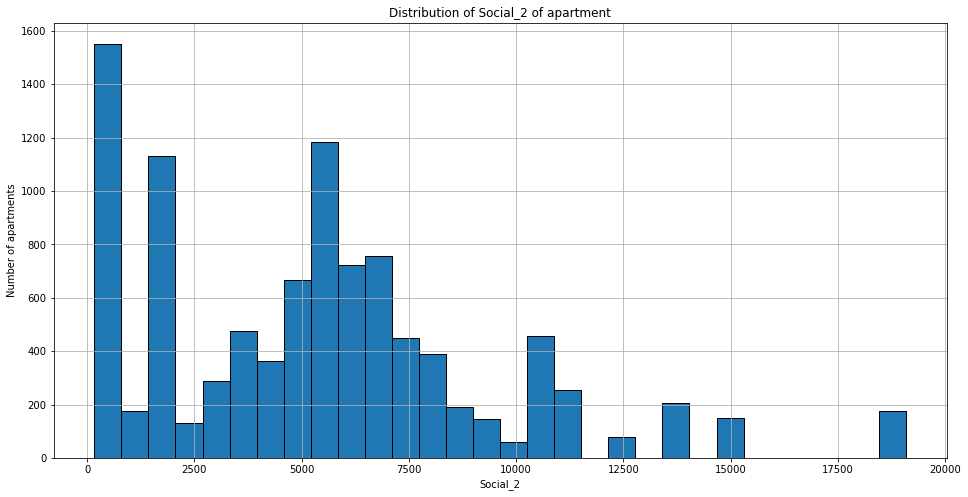

In [2012]:
plt.figure(figsize=(16,8))
plt.ylabel('Number of apartments')
plt.xlabel('Social_2')
plt.title('Distribution of Social_2 of apartment')
train_data.Social_2.hist(bins=30, edgecolor='black')

***Распределение очень похоже на Social_1, скорее всего данные признаки сильно коррелируют друг с другом***

Text(0, 0.5, 'Social_2')

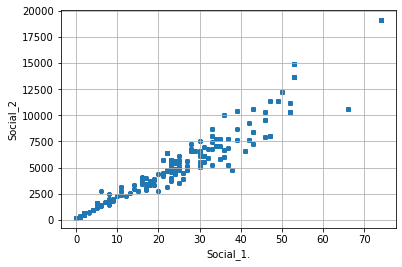

In [2013]:
pd.DataFrame(np.array([train_data['Social_1'],train_data['Social_2']]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('Social_1.')
plt.ylabel('Social_2')

<AxesSubplot:xlabel='Social_2'>

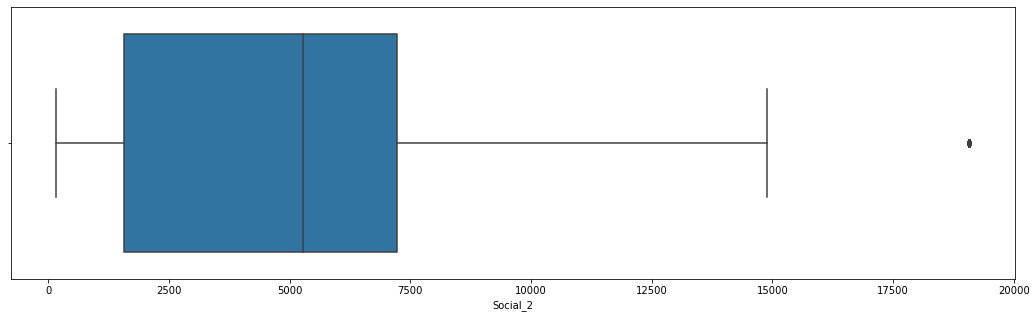

In [2014]:
plt.figure(figsize=(18,5))
plt.xlabel('Social_1')
sns.boxplot(train_data['Social_2'], whis=1.5)

In [2015]:
social_2_median = train_data['Social_2'].median()
train_data.loc[train_data['Social_2']>15000,'Social_2'] = social_2_median

<AxesSubplot:xlabel='Social_2'>

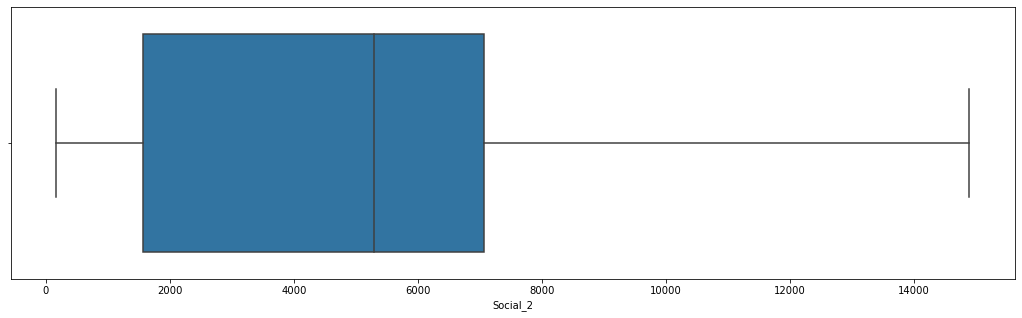

In [2016]:
plt.figure(figsize=(18,5))
plt.xlabel('Social_1')
sns.boxplot(train_data['Social_2'], whis=1.5)

### Social_3

In [2017]:
train_data.Social_3.dtype

dtype('int16')

In [2018]:
train_data.Social_3.describe()

count    10000.000000
mean         8.039200
std         23.831875
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max        141.000000
Name: Social_3, dtype: float64

In [2019]:
train_data.Social_3.sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  14,
        16,  19,  20,  23,  24,  27,  37,  39,  45,  48,  56,  59,  73,
        84,  87,  93, 141], dtype=int16)

In [2020]:
train_data.Social_3.value_counts()

0      2997
1      1861
3      1136
4       835
2       635
6       423
5       391
141     245
9       192
7       184
11      172
8       170
10      142
16      101
14       97
27       59
48       58
56       49
84       43
24       37
87       27
93       25
59       25
19       22
20       19
23       18
39       15
73       10
45        9
37        3
Name: Social_3, dtype: int64

<AxesSubplot:title={'center':'Distribution of Social_3 of apartment'}, xlabel='Social_3', ylabel='Number of apartments'>

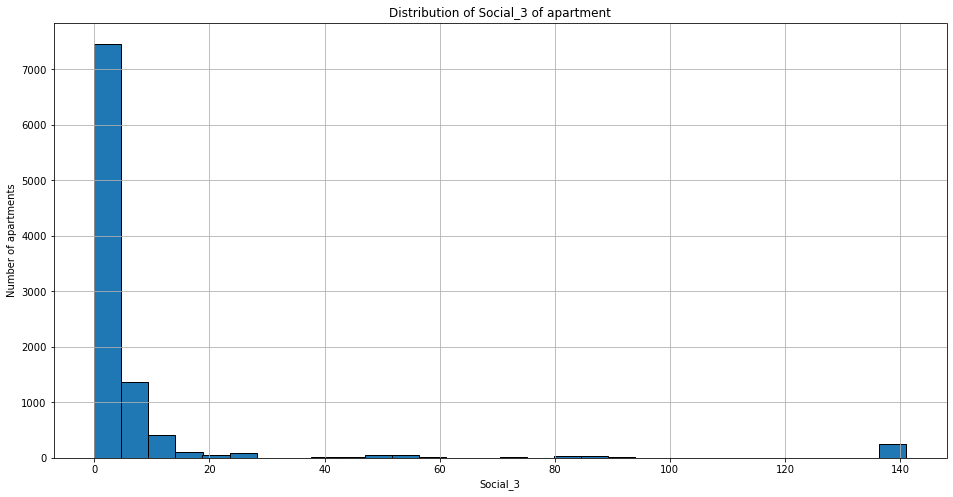

In [2021]:
plt.figure(figsize=(16,8))
plt.ylabel('Number of apartments')
plt.xlabel('Social_3')
plt.title('Distribution of Social_3 of apartment')
train_data.Social_3.hist(bins=30, edgecolor='black')

<AxesSubplot:xlabel='Social_3'>

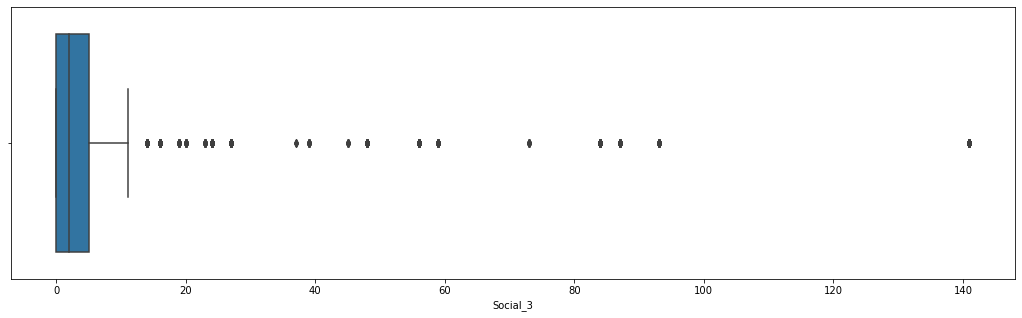

In [2022]:
plt.figure(figsize=(18,5))
plt.xlabel('Social_3')
sns.boxplot(train_data['Social_3'], whis=1.5)

In [2023]:
train_data.loc[train_data['Social_3']>10,'Social_3']

7       11
21      11
39      14
42      84
45      20
        ..
9927    59
9936    11
9955    20
9961    37
9997    14
Name: Social_3, Length: 1034, dtype: int16

In [2024]:
social_3_median = train_data['Social_3'].median()
train_data.loc[train_data['Social_3']>7,'Social_3'] = social_3_median #квантили не подходят, выборка становится монотонной даже при значении q=0,999

<AxesSubplot:xlabel='Social_3'>

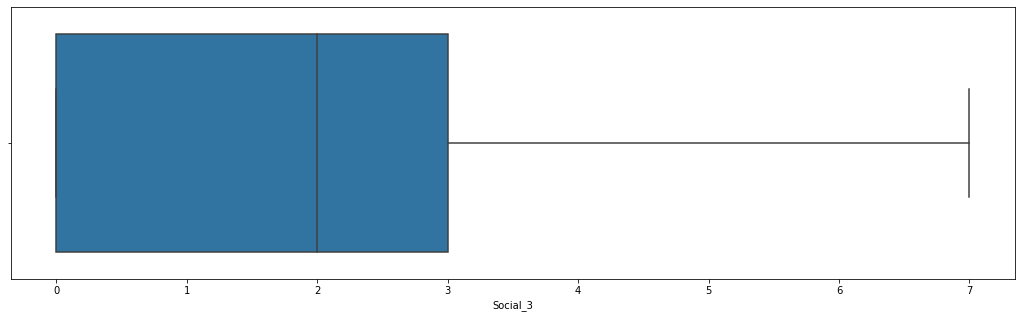

In [2025]:
plt.figure(figsize=(18,5))
plt.xlabel('Social_3')
sns.boxplot(train_data['Social_3'], whis=1.5)

In [2026]:
train_data.Social_3.value_counts()

0    2997
2    2173
1    1861
3    1136
4     835
6     423
5     391
7     184
Name: Social_3, dtype: int64

In [2027]:
train_data.describe() #признак 

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.0,10000.000000,10000.000000,10000.000000
mean,1.887695,inf,inf,5.906250,8.198500,inf,1985.559800,0.112488,24.687000,5109.312600,1.873600,inf,1.319500,4.231300,214138.937500
std,0.811035,1.392969e+01,9.976562e+00,3.292969,4.687653,5.4375,17.426893,0.109924,17.532614,3560.474465,1.818118,inf,1.493601,4.806341,92872.273438
min,1.000000,3.209375e+01,1.482812e+01,1.000000,2.000000,4.0000,1959.000000,0.000000,0.000000,168.000000,0.000000,0.0,0.000000,0.000000,59174.777344
25%,1.000000,4.240625e+01,2.508984e+01,4.000000,4.000000,9.0000,1975.000000,0.017654,6.000000,1564.000000,0.000000,350.0,0.000000,1.000000,153872.628906
50%,2.000000,5.250000e+01,3.278125e+01,6.000000,7.000000,14.0000,1977.000000,0.075439,25.000000,5285.000000,2.000000,900.0,1.000000,3.000000,192269.648438
75%,2.000000,6.340625e+01,4.046875e+01,8.000000,11.000000,17.0000,2001.000000,0.188843,36.000000,7065.000000,3.000000,1548.0,2.000000,6.000000,249135.460938
max,5.000000,8.787500e+01,6.006250e+01,12.000000,21.000000,25.0000,2020.000000,0.437988,74.000000,14892.000000,7.000000,4848.0,6.000000,23.000000,633233.437500


In [2028]:
train_data

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,3.0,52.50000,32.781250,10.0,4,10.0,2014,0.075439,11,3097,0,NaN,0,0,B,305018.875000
1,1.0,39.84375,23.171875,8.0,7,8.0,1966,0.118530,30,6207,1,1183.0,1,0,B,177734.546875
2,3.0,78.31250,47.687500,10.0,2,17.0,1988,0.025604,33,5261,0,240.0,3,1,B,282078.718750
3,1.0,40.40625,25.234375,1.0,10,22.0,1977,0.007122,1,264,0,NaN,0,1,B,168106.000000
4,2.0,64.31250,38.562500,9.0,16,16.0,1972,0.282715,33,8667,2,NaN,0,6,B,343995.093750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,49.09375,33.281250,6.0,3,12.0,1981,0.300293,52,10311,6,NaN,1,9,B,119367.453125
9996,2.0,64.31250,37.031250,9.0,13,13.0,1977,0.072144,2,629,1,NaN,0,0,A,199715.156250
9997,1.0,52.50000,16.562500,5.0,3,5.0,1977,0.075439,20,4386,2,NaN,1,5,B,165953.906250
9998,1.0,32.34375,22.328125,5.0,3,9.0,1969,0.194458,47,8004,3,125.0,3,5,B,171842.406250


### Healthcare_1	

In [2029]:
train_data.Healthcare_1.dtype

dtype('float16')

In [2030]:
train_data.Healthcare_1.describe()

count    5202.0
mean        inf
std         inf
min         0.0
25%       350.0
50%       900.0
75%      1548.0
max      4848.0
Name: Healthcare_1, dtype: float64

In [2031]:
train_data.Healthcare_1.sort_values().unique()

array([   0.,   30.,   32.,   35.,   46.,   75.,   80.,  100.,  125.,
        145.,  165.,  176.,  192.,  200.,  229.,  240.,  262.,  320.,
        325.,  350.,  370.,  520.,  540.,  562.,  620.,  628.,  645.,
        705.,  730.,  750.,  770.,  800.,  810.,  830.,  900.,  920.,
        990., 1015., 1020., 1036., 1046., 1084., 1130., 1145., 1183.,
       1308., 1322., 1340., 1406., 1430., 1450., 1547., 1548., 1575.,
       1786., 1815., 1894., 1937., 1940., 1970., 1994., 2078., 2300.,
       2500., 2620., 2644., 2672., 2716., 2728., 2856., 2890., 3300.,
       3856., 4088., 4130., 4508., 4704., 4850.,   nan], dtype=float16)

In [2032]:
train_data.Healthcare_1.value_counts()

540.0     511
30.0      348
1046.0    245
2300.0    191
750.0     163
         ... 
370.0      14
32.0       12
1815.0     10
35.0        2
0.0         1
Name: Healthcare_1, Length: 78, dtype: int64

<AxesSubplot:title={'center':'Distribution of Healthcare_1 of apartment'}, xlabel='Healthcare_1', ylabel='Number of apartments'>

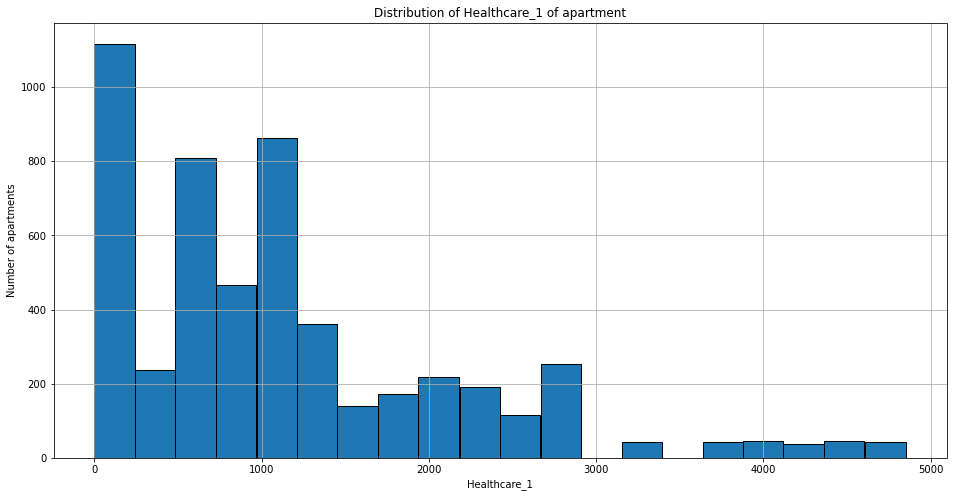

In [2033]:
plt.figure(figsize=(16,8))
plt.ylabel('Number of apartments')
plt.xlabel('Healthcare_1')
plt.title('Distribution of Healthcare_1 of apartment')
train_data.Healthcare_1.hist(bins=20, edgecolor='black')

<AxesSubplot:xlabel='Healthcare_1'>

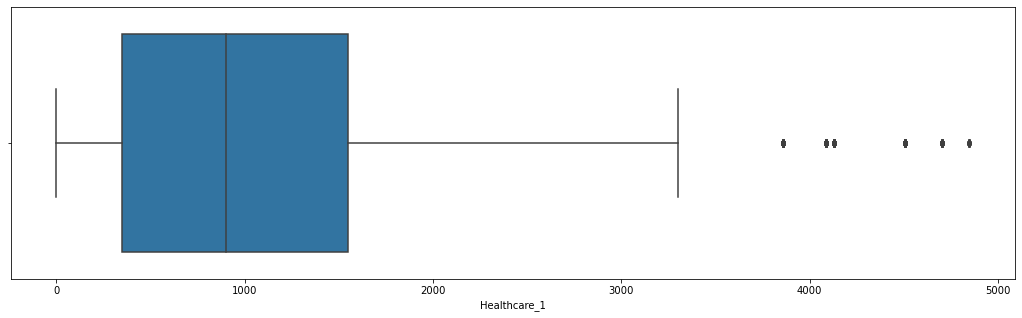

In [2034]:
plt.figure(figsize=(18,5))
plt.xlabel('Healthcare_1')
sns.boxplot(train_data['Healthcare_1'], whis=1.5)

In [2035]:
train_data['Healthcare_1'].isnull().sum() # Практически половина выборки представлена пропусками.
# Заменив их на медиану, мы сделаем признак маловариабельным --> стоит поискать другой способ


4798

***Возможно получится воcстановить значения Healthcare_1 по значениям Healthcare_2***

<AxesSubplot:title={'center':'Distribution of Healthcare_2 of apartment'}, xlabel='Healthcare_2'>

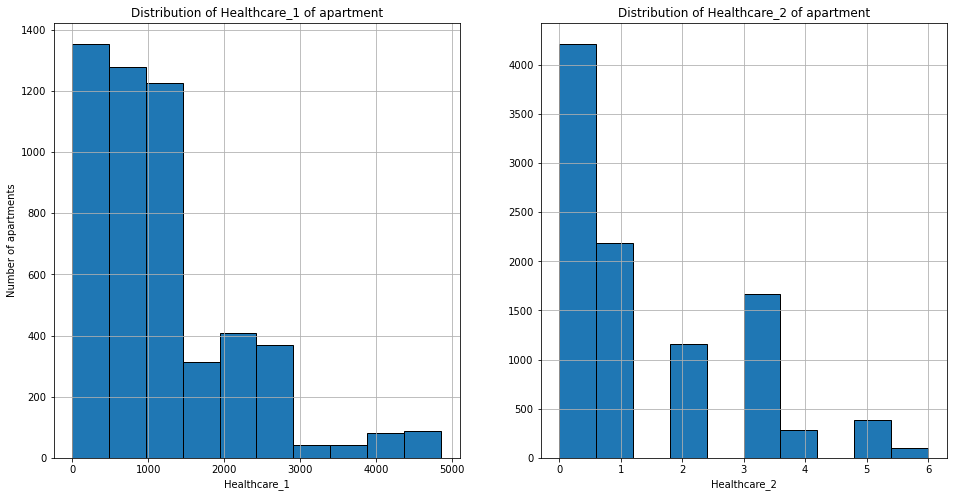

In [2036]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.ylabel('Number of apartments')
plt.xlabel('Healthcare_1')
plt.title('Distribution of Healthcare_1 of apartment')
train_data.Healthcare_1.hist(bins=10, edgecolor='black')

plt.subplot(122)
plt.xlabel('Healthcare_2')
plt.title('Distribution of Healthcare_2 of apartment')
train_data.Helthcare_2.hist(bins=10, edgecolor='black')

Text(0, 0.5, 'Helthcare_2')

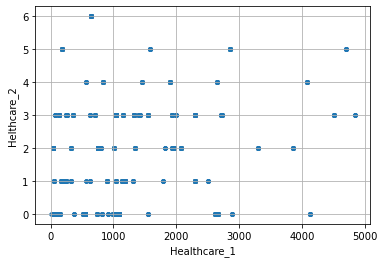

In [2037]:
pd.DataFrame(np.array([train_data['Healthcare_1'],train_data['Helthcare_2']]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('Healthcare_1')
plt.ylabel('Helthcare_2')

***Корреляции нет, логичнее будет удалить признак***

In [2038]:
train_data.drop(['Healthcare_1'],axis=1,inplace=True)

### Healthcare_2

In [2039]:
train_data.Helthcare_2.describe()

count    10000.000000
mean         1.319500
std          1.493601
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: Helthcare_2, dtype: float64

In [2040]:
train_data.Helthcare_2.value_counts()

0    4214
1    2183
3    1670
2    1158
5     388
4     288
6      99
Name: Helthcare_2, dtype: int64

<AxesSubplot:xlabel='Helthcare_2'>

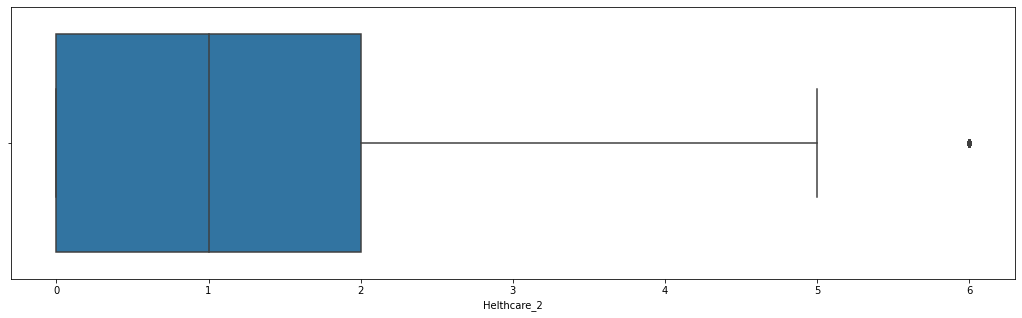

In [2041]:
plt.figure(figsize=(18,5))
plt.xlabel('Helthcare_2')
sns.boxplot(train_data['Helthcare_2'], whis=1.5)

In [2042]:
healthcare_2_mode = train_data['Helthcare_2'].mode()[0]
healthcare_2_q_975 = np.quantile(train_data['Helthcare_2'],q=0.975)
train_data.loc[train_data.Helthcare_2>healthcare_2_q_975,'Helthcare_2'] = healthcare_2_mode

<AxesSubplot:xlabel='Helthcare_2'>

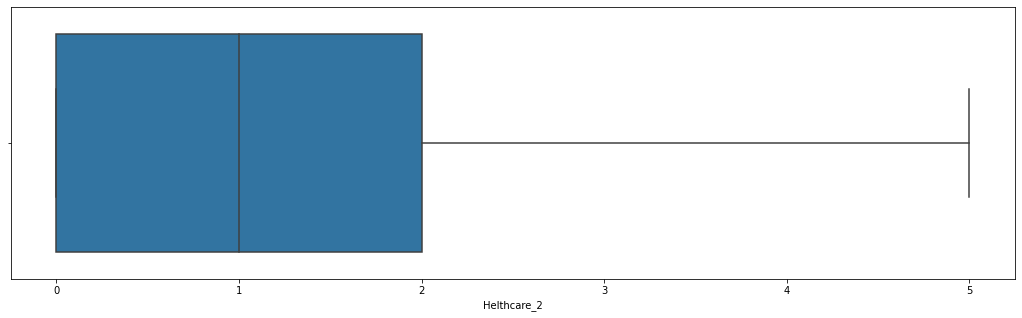

In [2043]:
plt.figure(figsize=(18,5))
plt.xlabel('Helthcare_2')
sns.boxplot(train_data['Helthcare_2'], whis=1.5)

### Shops_1

In [2044]:
train_data.Shops_1.describe()

count    10000.000000
mean         4.231300
std          4.806341
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         23.000000
Name: Shops_1, dtype: float64

In [2045]:
train_data.Shops_1.value_counts()

0     2316
1     1325
5     1324
2      964
4      841
3      711
6      487
11     401
9      316
7      294
8      253
23     245
10     215
15     176
16      83
19      49
Name: Shops_1, dtype: int64

<AxesSubplot:xlabel='Shops_1'>

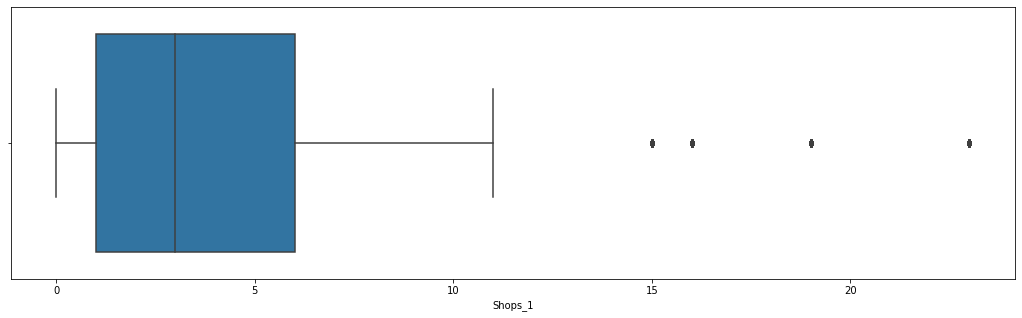

In [2046]:
plt.figure(figsize=(18,5))
plt.xlabel('Shops_1')
sns.boxplot(train_data['Shops_1'], whis=1.5)

In [2047]:
shops_1_mode = train_data['Shops_1'].mode()[0]
shops_1_q_975 = np.quantile(train_data['Shops_1'],q=0.975)
train_data.loc[train_data.Shops_1>healthcare_2_q_975,'Shops_1'] = shops_1_mode

<AxesSubplot:xlabel='Shops_1'>

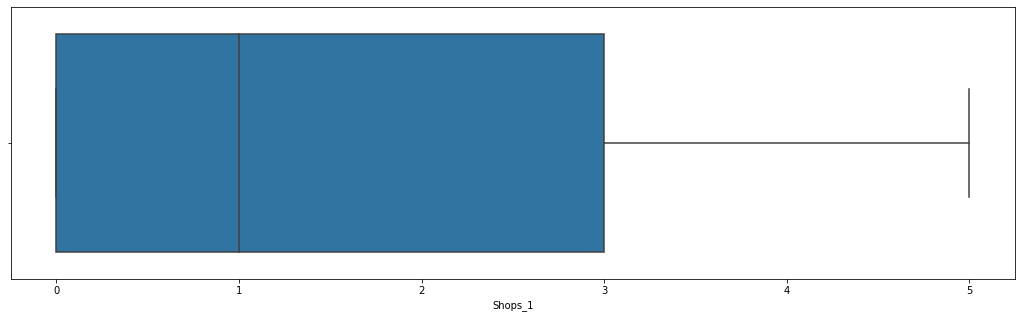

In [2048]:
plt.figure(figsize=(18,5))
plt.xlabel('Shops_1')
sns.boxplot(train_data['Shops_1'], whis=1.5)

### Shops_2

In [2049]:
train_data.Shops_2.describe()

count     10000
unique        2
top           B
freq       9175
Name: Shops_2, dtype: object

In [2050]:
train_data.Shops_2.value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

***Ситуация аналогична c Ecology_2_3 - отношение больше 9/10***

In [2051]:
train_data.drop(['Shops_2'], axis=1,inplace=True)
train_data

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
0,3.0,52.50000,32.781250,10.0,4,10.0,2014,0.075439,11,3097,0,0,0,305018.875000
1,1.0,39.84375,23.171875,8.0,7,8.0,1966,0.118530,30,6207,1,1,0,177734.546875
2,3.0,78.31250,47.687500,10.0,2,17.0,1988,0.025604,33,5261,0,3,1,282078.718750
3,1.0,40.40625,25.234375,1.0,10,22.0,1977,0.007122,1,264,0,0,1,168106.000000
4,2.0,64.31250,38.562500,9.0,16,16.0,1972,0.282715,33,8667,2,0,0,343995.093750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,49.09375,33.281250,6.0,3,12.0,1981,0.300293,52,10311,6,1,0,119367.453125
9996,2.0,64.31250,37.031250,9.0,13,13.0,1977,0.072144,2,629,1,0,0,199715.156250
9997,1.0,52.50000,16.562500,5.0,3,5.0,1977,0.075439,20,4386,2,1,5,165953.906250
9998,1.0,32.34375,22.328125,5.0,3,9.0,1969,0.194458,47,8004,3,3,5,171842.406250


### Добавление новых признаков

***Cтоит трансформировать целевой признак Price в более гибкий - цену за квадратный метр***

In [2052]:
train_data.rename(columns={'Price':'Price_per_square'}, inplace=True)
train_data['Price_per_square'] = train_data['Price_per_square']//train_data['Square']

In [2053]:
train_data['Room_size'] = train_data['Square']//train_data['Rooms'] # можно ввести признак - средний размер комнаты

In [2054]:
train_data

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price_per_square,Room_size
0,3.0,52.50000,32.781250,10.0,4,10.0,2014,0.075439,11,3097,0,0,0,5809.0,17.0
1,1.0,39.84375,23.171875,8.0,7,8.0,1966,0.118530,30,6207,1,1,0,4460.0,39.0
2,3.0,78.31250,47.687500,10.0,2,17.0,1988,0.025604,33,5261,0,3,1,3601.0,26.0
3,1.0,40.40625,25.234375,1.0,10,22.0,1977,0.007122,1,264,0,0,1,4160.0,40.0
4,2.0,64.31250,38.562500,9.0,16,16.0,1972,0.282715,33,8667,2,0,0,5348.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,49.09375,33.281250,6.0,3,12.0,1981,0.300293,52,10311,6,1,0,2431.0,24.0
9996,2.0,64.31250,37.031250,9.0,13,13.0,1977,0.072144,2,629,1,0,0,3105.0,32.0
9997,1.0,52.50000,16.562500,5.0,3,5.0,1977,0.075439,20,4386,2,1,5,3161.0,52.0
9998,1.0,32.34375,22.328125,5.0,3,9.0,1969,0.194458,47,8004,3,3,5,5313.0,32.0


## Оформление класса для подготовки датасета

In [2055]:
class DataTrans:
    
    def __init__(self):
        """Параметры класса"""
        self.Rooms_mode = None
        self.kitchen_to_square = None
        self.life_to_square = None
        self.square_q_025 = None
        self.square_q_950 = None
        self.square_median = None
        self.life_square_q_950 = None
        self.life_square_q_025 = None
        self.life_square_median = None
        self.kitchen_square_q_950 = None
        self.kitchen_square_median = None
        self.floor_q_975 = None
        self.floor_q_025 = None
        self.floor_mode = None
        self.house_floor_q_975 = None
        self.house_floor_q_025 = None
        self.house_floor_mode = None
        self.house_year_025 = None
        self.house_year_mode = None
        self.eco_1_q_975 = None 
        self.eco_1_q_025 = None
        self.eco_1_median = None
        self.social_3_median = None
        self.healthcare_2_mode = None
        self.healthcare_2_q_975 = None
        self.shops_1_mode = None
        self.shops_1_q_975 = None
        self.social_2_median = None
        
    def fit(self, df):
        """Сохранение статистик"""
        
        # Расчет показателей для предварительной обработки неадекватных данных
        self.kitchen_to_square = df['KitchenSquare'].median() / df['Square'].median()
        self.life_to_square = df['LifeSquare'].median() / df['Square'].median()
        
        # Расчет квантилей
        self.square_q_950 = np.quantile(df['Square'], q=0.95)
        self.square_q_025 = np.quantile(df['Square'], q=0.025)
        self.life_square_q_950 = np.quantile(df['LifeSquare'], q=0.95)
        self.life_square_q_025 = np.quantile(df['LifeSquare'], q=0.025)
        self.kitchen_square_q_950 = np.quantile(df['KitchenSquare'], q=0.95)
        self.floor_q_975 = np.quantile(df['Floor'], q=0.975)
        self.floor_q_025 = np.quantile(df['Floor'], q=0.025)
        self.house_floor_q_975 = np.quantile(df['HouseFloor'], q=0.975)
        self.house_floor_q_025 = np.quantile(df['HouseFloor'], q=0.025)
        self.house_year_025 = np.quantile(df['HouseYear'],q=0.025)
        self.eco_1_q_975 = np.quantile(df['Ecology_1'], q=0.975)
        self.eco_1_q_025 = np.quantile(df['Ecology_1'], q=0.025)
        self.healthcare_2_q_975 = np.quantile(df['Helthcare_2'],q=0.975)
        self.shops_1_q_975 = np.quantile(df['Shops_1'],q=0.975) 
        
        # Расчет медиан и мод
        self.Rooms_mode = df['Rooms'].mode()
        self.life_square_median = df['LifeSquare'].median()
        self.kitchen_square_median = df['KitchenSquare'].median()
        self.square_median = df['Square'].median()
        self.floor_mode = df['Floor'].mode()[0]
        self.house_floor_mode = df['HouseFloor'].mode()[0]
        self.house_year_mode = df['HouseYear'].mode()[0]
        self.eco_1_median = df['Ecology_1'].median()
        self.social_3_median = df['Social_3'].median()
        self.healthcare_2_mode = df['Helthcare_2'].mode()[0]
        self.shops_1_mode = df['Shops_1'].mode()[0]
        self.social_2_median = df['Social_2'].median()
        
    def transform(self, df):
        """Трансформация данных"""
        
        # 0. Предварительная обработка неадекватных данных
        df.loc[(df['KitchenSquare']>df['Square']),'KitchenSquare'] = df.loc[(df['KitchenSquare']>df['Square']),'Square'] * kitchen_to_square
        df.loc[(df['LifeSquare']>df['Square']),'LifeSquare'] = df.loc[(df['LifeSquare']>df['Square']),'Square'] * life_to_square
        df.loc[df['HouseFloor']==0,'HouseFloor'] = df.loc[df['HouseFloor']==0,'Floor']
        df.loc[df['Floor']>df['HouseFloor'],'HouseFloor'] = df.loc[df['Floor']>df['HouseFloor'],'Floor']
        
        # 1. Пропуски
        df.loc[df['LifeSquare'].isnull()==True,'LifeSquare'] = df.loc[df['LifeSquare'].isnull()==True,'Square'] * life_to_square
        
        # 2. Выбросы (outliers)
        df.loc[(df['Rooms'] < 1)|(df['Rooms']>5),'Rooms'] = Rooms_mode
        df.loc[(df['LifeSquare']>life_square_q_950)|(df['LifeSquare']<life_square_q_025),'LifeSquare'] = life_square_median
        df.loc[(df['KitchenSquare']>kitchen_square_q_950)|(df['KitchenSquare']<1),'KitchenSquare'] = kitchen_square_median
        df.loc[(df['Floor']>floor_q_975)|(df['Floor']<floor_q_025),'Floor'] = floor_mode
        df.loc[(df['HouseFloor']>house_floor_q_975)|(df['HouseFloor']<house_floor_q_025),'HouseFloor'] = house_floor_mode
        df.loc[df['HouseYear']<house_year_025,'HouseYear'] = house_year_mode
        df.loc[(df['Ecology_1']>eco_1_q_975)|(df['Ecology_1']<eco_1_q_025),'Ecology_1'] = eco_1_median
        df.loc[df['Social_3']>7,'Social_3'] = social_3_median
        df.loc[df.Helthcare_2>healthcare_2_q_975,'Helthcare_2'] = healthcare_2_mode
        df.loc[df['Social_2']>15000,'Social_2'] = social_2_median
        
        # 3. Новые фичи (features)
        df.rename(columns={'Price':'Price_per_square'}, inplace=True)

        df['Room_size'] = df['Square']//df['Rooms'] #средний размер комнаты
        
        return df


In [2056]:
train_data

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price_per_square,Room_size
0,3.0,52.50000,32.781250,10.0,4,10.0,2014,0.075439,11,3097,0,0,0,5809.0,17.0
1,1.0,39.84375,23.171875,8.0,7,8.0,1966,0.118530,30,6207,1,1,0,4460.0,39.0
2,3.0,78.31250,47.687500,10.0,2,17.0,1988,0.025604,33,5261,0,3,1,3601.0,26.0
3,1.0,40.40625,25.234375,1.0,10,22.0,1977,0.007122,1,264,0,0,1,4160.0,40.0
4,2.0,64.31250,38.562500,9.0,16,16.0,1972,0.282715,33,8667,2,0,0,5348.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,49.09375,33.281250,6.0,3,12.0,1981,0.300293,52,10311,6,1,0,2431.0,24.0
9996,2.0,64.31250,37.031250,9.0,13,13.0,1977,0.072144,2,629,1,0,0,3105.0,32.0
9997,1.0,52.50000,16.562500,5.0,3,5.0,1977,0.075439,20,4386,2,1,5,3161.0,52.0
9998,1.0,32.34375,22.328125,5.0,3,9.0,1969,0.194458,47,8004,3,3,5,5313.0,32.0


## Обучение модели

In [2057]:
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, roc_auc_score as roc, SCORERS as SCORERS
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2058]:
X = train_data.drop(['Price_per_square'],axis=1)
y = pd.DataFrame(train_data['Price_per_square']).copy()

In [2059]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.33,random_state=42, shuffle=True)

In [2060]:
# model = GradientBoostingRegressor(criterion='r2',
#                           min_samples_leaf=5,
#                           random_state=42)

In [2061]:
# %%time
# params = {'n_estimators':[300, 400,500,600], 
#           'max_depth':[2,3,4]}

# gs = GridSearchCV(model, params, 
#                   scoring='r2',cv=KFold(n_splits=5,random_state=21, shuffle=True),n_jobs=-1)
# gs.fit(X_train, y_train)

**Оптимальные параметры:**

In [2062]:
#gs.best_score_ 0.6376140523624698

In [2063]:
#gs.best_params_ #{'max_depth': 3, 'n_estimators': 500}

In [2064]:
model = GradientBoostingRegressor(criterion='mse',
                          min_samples_leaf=5,
                          random_state=42, n_estimators=500, max_depth=3)
model.fit(X_train,y_train)

GradientBoostingRegressor(criterion='mse', min_samples_leaf=5, n_estimators=500,
                          random_state=42)

In [2065]:
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)

***Оценка переобучения***

In [2066]:
r2(y_train,y_pred_train)

0.7749283921017802

In [2067]:
r2(y_valid,y_pred_valid)

0.6186809385985887

### Обучение на всем train

*Предварительная обработка тест_датасета:

In [2068]:
test_data.drop(['Ecology_2','Ecology_3', 'Healthcare_1','Id','DistrictId','Shops_2'], axis=1,inplace=True)

In [2069]:
test_data['Room_size'] = train_data['Square']//train_data['Rooms']

In [2070]:
test_data.loc[test_data['LifeSquare'].isnull()==True,'LifeSquare']

2      NaN
4      NaN
11     NaN
13     NaN
14     NaN
        ..
4985   NaN
4986   NaN
4988   NaN
4989   NaN
4993   NaN
Name: LifeSquare, Length: 1041, dtype: float64

In [2071]:
test_data.loc[test_data['LifeSquare'].isnull()==True,'LifeSquare'] = life_square_median

In [2072]:
test_data

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Room_size
0,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,24,4378,0,1,1,17.0
1,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,2,629,1,0,0,39.0
2,2.0,59.463678,32.781250,9.0,19,19.0,1977,0.211401,9,1892,0,0,1,26.0
3,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,2,475,0,0,0,40.0
4,1.0,53.837056,32.781250,1.0,8,17.0,1977,0.309479,35,7715,4,0,6,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,31,6119,4,1,2,45.0
4996,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,15,2787,2,0,7,17.0
4997,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,28,6533,1,2,5,28.0
4998,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,33,7976,5,0,11,20.0


In [2073]:
model.fit(X,y)

GradientBoostingRegressor(criterion='mse', min_samples_leaf=5, n_estimators=500,
                          random_state=42)

In [2077]:
final_predict = pd.DataFrame(model.predict(test_data), columns=['Price_per_square'])

In [2079]:
final_predict.to_csv('Aliev_prediction.csv')